<a href="https://colab.research.google.com/github/vihanpereraux/Human-Emotions-Visualizer/blob/master/Human_Emotions_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Dec 11 14:02:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   5534MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# getting installed packages
!pip install --upgrade --force-reinstall `cat /content/gdrive/My\ Drive/colab_installed.txt`

ERROR: Invalid requirement: '@'


In [ ]:
!pip install diffusers==0.10.0
!pip install transformers scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 502 kB 24.3 MB/s 
     |████████████████████████████████| 182 kB 18.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 32.7 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 191 kB 82.9 MB/s 
     |████████████████████████████████| 7.6 MB 78.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 31.7 MB/s 


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16) 

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
pipe = pipe.to("cuda")

In [ ]:
# saving installed packages
!pip freeze --local > /content/gdrive/My\ Drive/colab_installed.txt

/bin/bash: /content/gdrive/My Drive/colab_installed.txt: Transport endpoint is not connected


  0%|          | 0/50 [00:00<?, ?it/s]

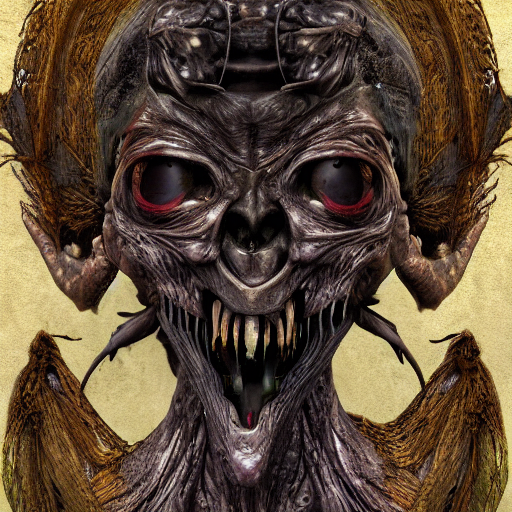

In [119]:
prompt = "3D creature, wicca, occult, harvest, fall, hyper-realistic, ultra resolution, creepy, dark, witchcore"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with 
image

  0%|          | 0/50 [00:00<?, ?it/s]

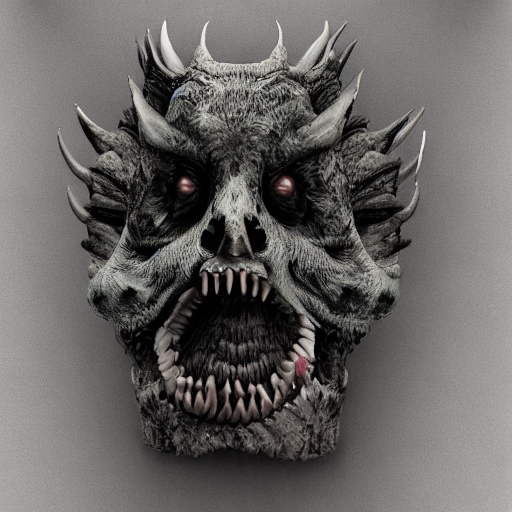

In [121]:
import torch

generator = torch.Generator("cuda").manual_seed(2028)

image = pipe(prompt, generator=generator).images[0]

image

  0%|          | 0/50 [00:00<?, ?it/s]

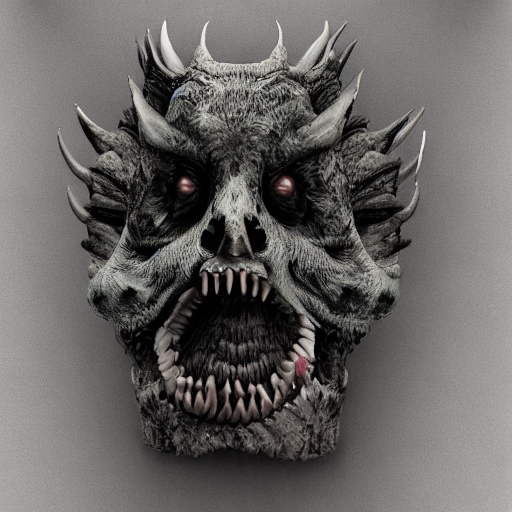

In [124]:
import torch

generator = torch.Generator("cuda").manual_seed(2028)

image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]

image